# Bank Loan Approval Prediction - Logistic Regression Project 
--------------------------------------------------------------------------------
    Predict whether a bank should approve a customer's loan application
    Goal : Approved = 1, Not Approved = 0 using customer features

-------------------------------------------------------------
## Project Covers: 
     Clean dataset loading 
     Feature Selection 
     Train/Test split 
     Scaling 
     Training (Logistic Regression)
     Evaluation (Accuracy , Precision , Recall , F1)
     Confusion Matrix + Classification Report 
     Decision Threshold 
     AUC - ROC Curve
     Prediction Function 

## Import Libraries

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,        # Measures overall classification accuracy
    precision_score,       # Measures correctness of positive predictions
    recall_score,          # Measures the model’s ability to identify actual positives
    f1_score,              # Balanced metric combining precision and recall
    confusion_matrix,      # Displays classification outcomes (TP, TN, FP, FN)
    classification_report, # Generates a comprehensive performance summary
    roc_curve,             # Computes values for plotting the ROC curve
    roc_auc_score          # Quantifies model discrimination ability
)

## Load Dataset 

In [165]:
df = pd.read_csv("bank_loan_5000.csv")
print("Dataset Loaded Successfully!")
print(df.head())

print("\nShape:", df.shape)

Dataset Loaded Successfully!
   Age  Income  CreditScore EmploymentStatus  Approved
0   59   41966          679         Salaried         1
1   49   53280          546    Self-employed         0
2   35   72036          603         Salaried         1
3   63  131938          850         Salaried         1
4   28   77597          704         Salaried         1

Shape: (5000, 5)


In [166]:
print("\n======================Data Overview======================")

# Shape of the Dataset 
print("\nDataset Info:")

# Data types and info 
print("\nDataset Info:")
df.info()

# check Missing values
print("\nMissing values in Each Column:")
print(df.isnull().sum())


======================Data Overview======================

Dataset Info:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               5000 non-null   int64 
 1   Income            5000 non-null   int64 
 2   CreditScore       5000 non-null   int64 
 3   EmploymentStatus  5000 non-null   object
 4   Approved          5000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 195.4+ KB

Missing values in Each Column:
Age                 0
Income              0
CreditScore         0
EmploymentStatus    0
Approved            0
dtype: int64


In [167]:
# count each Empolyment Status Category 
print("\nEmployement Status Distribution:")
print(df["EmploymentStatus"].value_counts())

# Prview the last 10 rows 
print("\n 10 rows of the Dataset:")
print(df.tail(10));


Employement Status Distribution:
EmploymentStatus
Salaried         2534
Self-employed    1486
Unemployed        980
Name: count, dtype: int64

 10 rows of the Dataset:
      Age  Income  CreditScore EmploymentStatus  Approved
4990   31   86632          640         Salaried         1
4991   59   79571          783         Salaried         1
4992   63   75354          630       Unemployed         1
4993   51  141228          740       Unemployed         1
4994   37   51107          818         Salaried         1
4995   53   86123          554       Unemployed         0
4996   52   53119          732    Self-employed         1
4997   49   68769          605       Unemployed         0
4998   41  137083          406    Self-employed         0
4999   41   93443          702       Unemployed         1


In [168]:
# Summary Statistic for numerical feature
print("\nSummary statistic")
print(df.describe())

# Unique values in Employement Statues 
print("\nUnique Employment Status Values:")
print(df["EmploymentStatus"].unique())


Summary statistic
               Age         Income  CreditScore     Approved
count  5000.000000    5000.000000   5000.00000  5000.000000
mean     42.575000   85201.855800    646.82920     0.657000
std      12.554597   29404.239215    109.60228     0.474759
min      21.000000   20000.000000    300.00000     0.000000
25%      32.000000   65042.250000    571.00000     0.000000
50%      43.000000   85113.000000    647.00000     1.000000
75%      53.000000  105414.500000    723.00000     1.000000
max      64.000000  194731.000000    900.00000     1.000000

Unique Employment Status Values:
['Salaried' 'Self-employed' 'Unemployed']


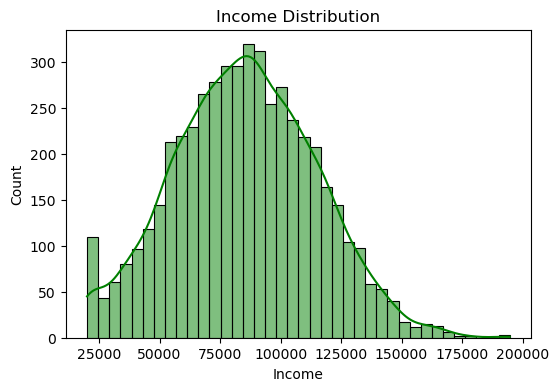

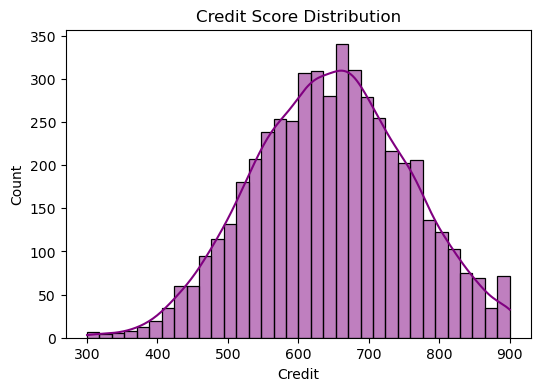

In [169]:
plt.figure(figsize=(6,4))
sns.histplot(df["Income"], kde=True , color="Green")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["CreditScore"], kde=True , color="Purple")
plt.title("Credit Score Distribution")
plt.xlabel("Credit")
plt.ylabel("Count")
plt.show()

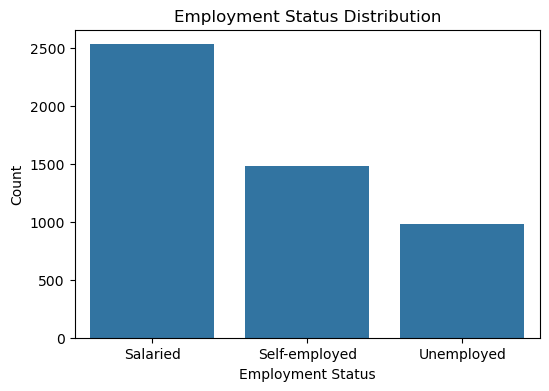

In [170]:
plt.figure(figsize=(6,4))
sns.countplot(x="EmploymentStatus", data=df)
plt.title("Employment Status Distribution")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

## Feature Selection Fearture

In [171]:
# select important feature 
df = df[["Age", "Income", "CreditScore", "EmploymentStatus" , "Approved"]]

## Encode Employment Status 

In [172]:
mapping = {"Unemployed":0, "Self-employed":1, "Salaried":2}
df["EmploymentEncoded"] = df["EmploymentStatus"].map(mapping)

In [173]:
#final FEature Matrix / Target 
X = df[["Age","Income","CreditScore","EmploymentEncoded"]]
y = df["Approved"]

print("\nFinal Features:\n", X.head())


Final Features:
    Age  Income  CreditScore  EmploymentEncoded
0   59   41966          679                  2
1   49   53280          546                  1
2   35   72036          603                  2
3   63  131938          850                  2
4   28   77597          704                  2


In [175]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y 
)

print("Train Size :",X_train.shape)
print("Test Size :", X_test.shape)

Train Size : (4000, 4)
Test Size : (1000, 4)


## Feature Selection

In [176]:
scaler = StandardScaler()
# Create a scaler that standardizes data (mean = 0, std = 1)

X_train_scaled = scaler.fit_transform(X_train)
# Learn scaling from training data and apply it

X_test_scaled = scaler.transform(X_test)
# Apply the SAME scaling to test data (no learning)


## TRAIN LOGISTIC REGRESSION MODEL

In [177]:
model = LogisticRegression(max_iter=1000)  # Improves accuracy
# Create a Logistic Regression model

model.fit(X_train_scaled, y_train)
# Train the model using the scaled training data and their correct labels

print("Model Training Completed!")
# Confirm that training is finished


Model Training Completed!


## MODEL PREDICTIONS

In [178]:
# MODEL PREDICTIONS

y_pred = model.predict(X_test_scaled)
# Predict class labels (0 or 1) for the test data

y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Get probability of class 1 (loan approved) for each test sample

## Evaluation Metrics 

In [179]:
print("\n----------------MODEL EVALUATION------------------")

print("Accuracy : ", accuracy_score(y_test, y_pred));
#how many total prediction were correct 

print("Precision : ", precision_score(y_test, y_pred));
# out of all predicted yes , how many were actually Yes (controlls falses positive)

print("Recall :" , recall_score(y_test, y_pred));
# Out of all actual Yes , how many were actually found (contols false negative)

print("F1 Score :" , f1_score(y_test, y_pred));
#Balance of precision and recall in one score



----------------MODEL EVALUATION------------------
Accuracy :  0.807
Precision :  0.8333333333333334
Recall : 0.882800608828006
F1 Score : 0.8573540280857354


## Model Evaluation 
    Accuracy = 0.80 (80%)
    Out of 100 loan Prediction , about 80 are correct.
    
    Precision = 0.83 (83%)
    When the model says "Yes - loan approved" , it is correct 83 time out of 100.
    
    Recall = 0.88 (88%)
    Out of all people who should get the loan , the model correctly finds 88% of them 
    
    F1 Score = 0.85 (85%)
    Overall balanced performance between Precision Recall.

------------------------------------------------------------------------------------------------
    Percentage help us understand model performance easily , regardless of dataset size

### Confusion Matrix + Classification Report 

In [180]:
print("\n-----------Confusion Matrix------------")
print(confusion_matrix(y_test, y_pred));
# Show TP, FP, , TN, FN, TO UNDERSTAND CORRECT AND INNCORECT PREDICTION 


-----------Confusion Matrix------------
[[227 116]
 [ 77 580]]


## CONFUSION MATRIX
    227 → True Negatives (Correctly predicted NO)
    116 → False Positives (Predicted YES but actually NO)
    77 → False Negatives (Predicted NO but actually YES)
    580 → True Positives (Correctly predicted YES)

In [181]:
print("\n-------------confusion Report-------------")
print(classification_report(y_test,y_pred));
# show the precision , recall , f1  and support for each class 


-------------confusion Report-------------
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       343
           1       0.83      0.88      0.86       657

    accuracy                           0.81      1000
   macro avg       0.79      0.77      0.78      1000
weighted avg       0.80      0.81      0.80      1000



## Class 0 (No / Loan Rejected)
    Precision 75% - when model says No , it is correct 75 times out of 100
    Recall 66% - Found 60% of actual No cases
    F1-score 70% - Balanced Score for No Class
    Support = 343 records 
-------------------------------------------------------------------------------
    Class 1 (Yes / Loan Approved)
    Precision 83% - when model says Yes , it is correct 83 times out of 100
    Recall 88% - Found 88% of actual Yes cases
    F1-score 86% - Balanced Score for Yes Class
    Support = 657 records
-----------------------------------------------------------------------------------
    Accuracy = 81% - Model predicted 81 correct out of 100
    Macro_Avg - simple average of both classes
    weighted_avg - Average based on Number of Records

## Decision Threshold Analysis 
    Decision Thresold Analysis means deciding at what probability value the model should say yes or no 
    >= 0.5 - Yes
    < 0.5  - No


In [182]:
threshold = 0.5 # Equal importance to yes and NO | balanced dataset 
print("\nDefault Threshold -", threshold)
print("prediction Probabilities (First 10):")
print(y_prob[:20]);   # show the 1st 10 probability values predicted by thhe model 


Default Threshold - 0.5
prediction Probabilities (First 10):
[0.50349068 0.51700387 0.86232171 0.05529872 0.545515   0.17097421
 0.23610463 0.77578626 0.99125383 0.91848506 0.37264593 0.48540888
 0.94472982 0.77048734 0.19519812 0.79766833 0.9708162  0.21522409
 0.33686485 0.81863478]


## AUC-ROC curve
    AUC-ROC tells us how well a model can separate positive and negative cases 
    It measures how the good the model is at distinguish Yes or No

In [183]:
# AUC tells how well the model separates YES vs NO.

# Step 1: Calculate False Positive rate, True Positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# fpr = how many wrong positives at each threshold
# tpr = how many correct positives at each threshold
# thresholds = different probability cut-off values

# Step 2: Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# AUC tells how well the model separates class 0 and class 1
# Higher AUC = better model

print("\nAUC Score:", auc)



AUC Score: 0.8610390013800693


## AUC Score = 0.86
    Means 86% chance the model will correctly seprate Yes or No 

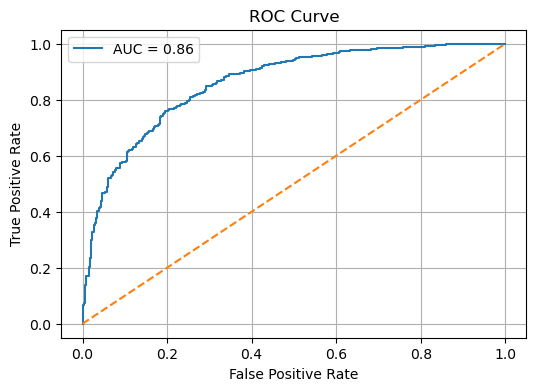

In [184]:
plt.figure(figsize=(6,4))
plt.plot(fpr , tpr , label=f"AUC = {auc:.2f}")
# Plot the Roc curve 

plt.plot([0,1],[0,1], '--') # drawss a random guessing line  | Used for comparison 
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


## Prediction Function 

In [187]:
def predict_loan(age,income, credit,employment):

    #1. Put the Customer data into DataFrame
    row = pd.DataFrame([[age,income,credit,mapping[employment]]],
                       columns=["Age","Income","CreditScore","EmploymentEncoded"])

    #2. Scale the data(same the scaling user during Training)
    row_scaled = scaler.transform(row)

    #3.Get Probability of loan approval
    prob = model.predict_proba(row_scaled)[0][1]

    #4. Final Prediction (0 or 1) using threshold 0.5
    pred = 1 if prob >=0.5 else 0

    #5 print simple output
    print(f"\nLoan ApprovalProbability = {prob:.2f}")

    if pred ==1:
        print("Loan Approved")
    else: 
        print("Loan Not Approved")



predict_loan(30,50000,800,'Salaried');
predict_loan(48,20000,450,'Unemployed')
predict_loan(25,90000,790,'Self-employed')


#---------------- USER INPUT ----------------
print("\n")
age = int(input("Enter Age : "))
income = float(input("Enter Income: "))
credit = int(input("Enter Credit Score): "))
employment = input("Enter Employment (Salaried / Self-employed / Unemployed): ").strip().title()

predict_loan(age, income, credit, employment)


Loan ApprovalProbability = 0.92
Loan Approved

Loan ApprovalProbability = 0.01
Loan Not Approved

Loan ApprovalProbability = 0.97
Loan Approved




Enter Age :  76
Enter Income:  123000
Enter Credit Score):  750
Enter Employment (Salaried / Self-employed / Unemployed):  UNEMPLOYED



Loan ApprovalProbability = 0.94
Loan Approved
